In [ ]:
# Implement conditional sampling
# Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions. 
# The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.



C:\Users\koola\AppData\Local\Temp\ipykernel_47216\2903243853.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, colors='red', alpha=0.5, levels=5, label='True density')
C:\Users\koola\AppData\Local\Temp\ipykernel_47216\2903243853.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


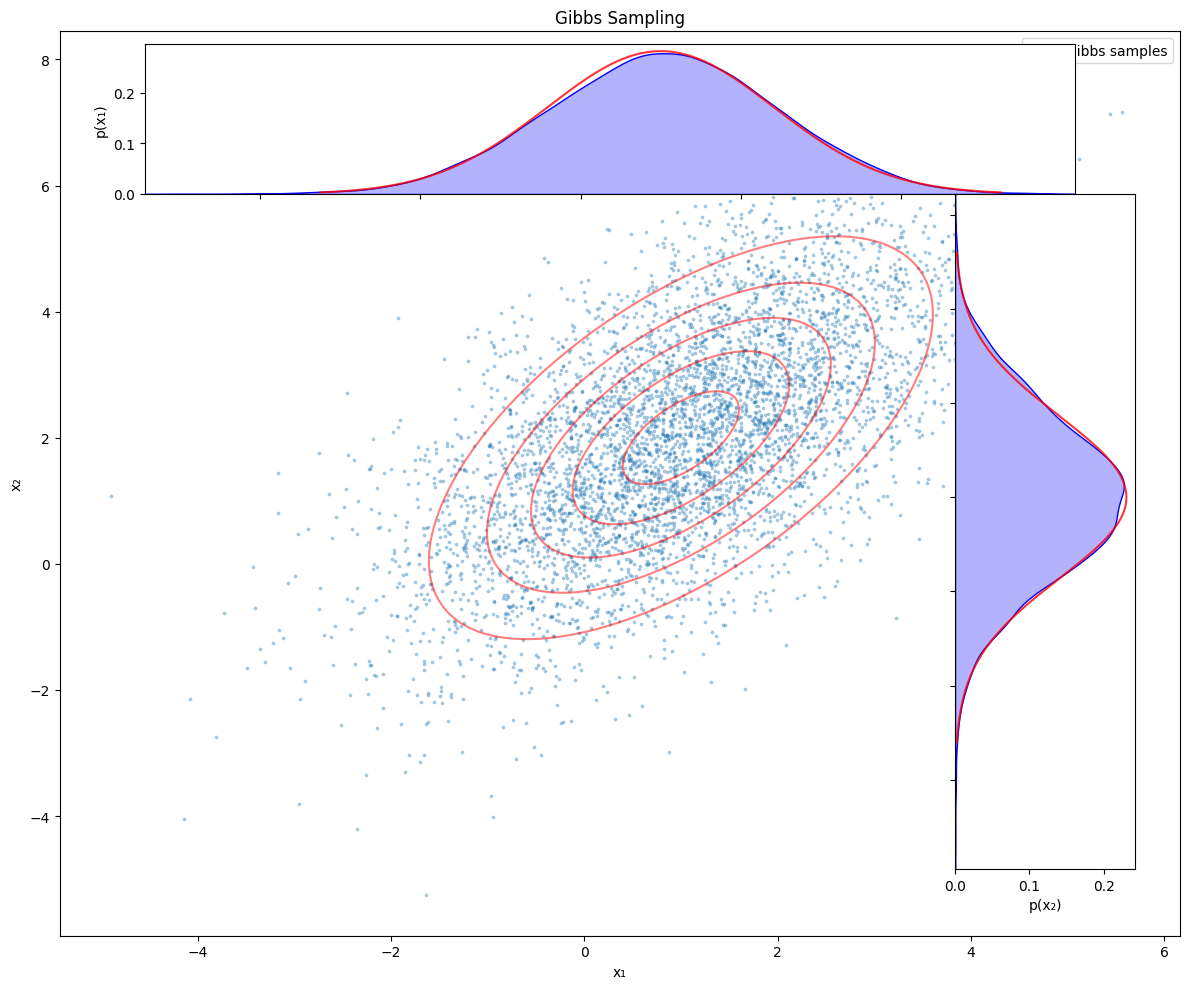

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

def gibbs_sampling(mu, Sigma, n_samples=5000):
    # components of gaussians (2)
    mu1, mu2 = mu
    sigma11 = Sigma[0, 0]
    sigma22 = Sigma[1, 1]
    sigma12 = Sigma[0, 1]
    sigma21 = Sigma[1, 0]
    
    # initialize
    samples = np.zeros((n_samples, 2))
    x = np.zeros(2)
    
    # sigma11_inv = 1.0 / sigma11
    # sigma22_inv = 1.0 / sigma22
    
    # Run Gibbs sampling
    for i in range(n_samples):

        # Sample x1 from p(x1|x2)
        mu_1_given_2 = mu1 + sigma12 * (1.0 / sigma22) * (x[1] - mu2)
        sigma_1_given_2 = sigma11 - sigma12 * (1.0 / sigma22) * sigma21
        x[0] = np.random.normal(mu_1_given_2, np.sqrt(sigma_1_given_2))
        
        # Sample x2 from p(x2|x1)
        mu_2_given_1 = mu2 + sigma21 * (1.0 / sigma11) * (x[0] - mu1)
        sigma_2_given_1 = sigma22 - sigma21 * (1.0 / sigma11) * sigma12
        x[1] = np.random.normal(mu_2_given_1, np.sqrt(sigma_2_given_1))
        
        samples[i] = x
    
    return samples

def plot_results(samples, mu, Sigma, title):
    """Plot the results of Gibbs sampling against the true distribution."""
    plt.figure(figsize=(12, 10))
    
    # Plot the samples
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=3, label='Gibbs samples')
    
    # Plot true contours
    x = np.linspace(mu[0] - 3*np.sqrt(Sigma[0, 0]), mu[0] + 3*np.sqrt(Sigma[0, 0]), 100)
    y = np.linspace(mu[1] - 3*np.sqrt(Sigma[1, 1]), mu[1] + 3*np.sqrt(Sigma[1, 1]), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mu, Sigma)
    Z = rv.pdf(pos)
    plt.contour(X, Y, Z, colors='red', alpha=0.5, levels=5, label='True density')
    
    # Plot marginal distributions on the axes
    ax = plt.gca()
    
    # Marginal for x1
    ax_x1 = plt.axes([0.125, 0.8, 0.775, 0.15])
    sns.kdeplot(samples[:, 0], ax=ax_x1, color='blue', fill=True, alpha=0.3)
    x1_range = np.linspace(mu[0] - 3*np.sqrt(Sigma[0, 0]), mu[0] + 3*np.sqrt(Sigma[0, 0]), 1000)
    x1_pdf = multivariate_normal(mu[0], Sigma[0, 0]).pdf(x1_range)
    ax_x1.plot(x1_range, x1_pdf, 'r-', alpha=0.8)
    ax_x1.set_xticklabels([])
    ax_x1.set_ylabel('p(x₁)')
    ax_x1.set_xlim(ax.get_xlim())
    
    # Marginal for x2
    ax_x2 = plt.axes([0.8, 0.125, 0.15, 0.675])
    sns.kdeplot(y=samples[:, 1], ax=ax_x2, color='blue', fill=True, alpha=0.3)
    x2_range = np.linspace(mu[1] - 3*np.sqrt(Sigma[1, 1]), mu[1] + 3*np.sqrt(Sigma[1, 1]), 1000)
    x2_pdf = multivariate_normal(mu[1], Sigma[1, 1]).pdf(x2_range)
    ax_x2.plot(x2_pdf, x2_range, 'r-', alpha=0.8)
    ax_x2.set_yticklabels([])
    ax_x2.set_xlabel('p(x₂)')
    ax_x2.set_ylim(ax.get_ylim())
    
    plt.sca(ax)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


mu = np.array([1.0, 2.0])  # Mean vector

# Covariance matrix must be positive definite
sigma = np.array([
    [2.0, 1.5],  # Σ11, Σ12
    [1.5, 3.0]   # Σ21, Σ22
])

# Generate samples using Gibbs sampling
n_samples = 5000
samples = gibbs_sampling(mu, sigma, n_samples)

# Display the results
plot_results(samples, mu, sigma, "Gibbs Sampling")

